# Average Truck Speed by Exploring Rear Dump Truck Cycle Time

Author: Dhitya Suryaputra Arieandra

Email: dhityariendra@gmail.com

In [834]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import timedelta
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


%matplotlib inline 

print ('Matplotlib version: ', mpl.__version__)


Matplotlib version:  3.3.3


In [725]:
# Importing data
# you can import file using csv file I uploaded in this repositories in Github
#!wget -O Cycle_Time_Oct20.csv https://github.com/dhityariendra/Applied_Data_Science_Mining_Industry/blob/main/Notebook/Cycle_Time_Oct20.csv 


df=pd.read_csv(r"H:\FILE\Thiess\FMS\Visual Studio Code\Coal_mining\Cycle_Time_Oct20.csv")
df.head(5)

,date,truck,truck_type,shovel,shovel_type,pit,material,distance_empty,distance_loaded,traveling_time,waiting_time,spotting_time,loading_time,hauling_time,queued_time,backing_time,tipping_time,shovel_hang_time
0,10/23/2020,RD2463,CAT 785C,EX3142,EX3600,MW4,Waste,2493,2493.0,364,4,13,103,454,0,31,34,179
1,10/23/2020,RD3323,CAT 785C,EX3082,EX3600,MW4,Waste,1914,1914.0,296,51,12,111,481,1,19,36,0
2,10/23/2020,RD2572,CAT 785C,EX3014,EX2500,TN1,Waste,1596,1596.0,214,18,1,164,270,3,26,27,68
3,10/23/2020,RD3110,CAT 785C,EX3042,EX3600,TN1,Waste,1799,1799.0,250,3,15,104,378,5,25,30,69
4,10/23/2020,RD3140,CAT 785C,EX3201,EX2500,TN1,Waste,2116,1985.0,317,1,0,252,481,1,33,33,74


In [726]:
# Checking data types in dataframe
df.dtypes

date                 object
truck                object
truck_type           object
shovel               object
shovel_type          object
pit                  object
material             object
distance_empty        int64
distance_loaded     float64
traveling_time        int64
waiting_time          int64
spotting_time         int64
loading_time          int64
hauling_time          int64
queued_time           int64
backing_time          int64
tipping_time          int64
shovel_hang_time      int64
dtype: object

In [727]:
# Convert obj to datetime for 'date' column
df['date'] = df['date'].astype('datetime64[ns]')

As we can see on dataset above, total cycle time of haul truck is total time of these activities: travelling, waiting (waiting at loading area), spotting, hauling, loading, queueing (waiting at dump area), backing and tipping. These value represent on seconds. And distance_empty and distance_loaded are represent on meter. We will calculate speed of the haul trucks by dividing average of empty and loaded distance with total cycle time.

In [728]:
# Total Cycle time

ct_sec = df['traveling_time']+df['waiting_time']+df['spotting_time']+df['loading_time']+df['hauling_time']+df['queued_time']+df['backing_time']+df['tipping_time']+df['traveling_time']
ct_min = (ct_sec/60).round(2) # ----- convert to minutes
ct_hour = (ct_min/60).round(2) # ----- convert to hour
df["ct(sec)"] = ct_sec
df["ct(min)"] = ct_min
df["ct(hour)"] = ct_hour

# Calculating Distance 

dist_avg_meter = ((df['distance_empty']+df['distance_loaded'])/2).round(2)
dist_avg_km = (dist_avg_meter/1000).round(2) # ----- convert to kilometres
df["dist_avg(km)"] = dist_avg_km

# Calculating Truck speed 

spd_empty = (df['distance_empty']/1000)/(df['traveling_time']/3600)
df["spd_empty(km/hr)"] = spd_empty.round(2)

spd_loaded = (df['distance_loaded']/1000)/(df['hauling_time']/3600)
df["spd_loaded(km/hr)"] = spd_loaded.round(2)

spd_avg = ((df["spd_empty(km/hr)"]+df["spd_loaded(km/hr)"])/2)
df["spd_avg(km/hr)"] = spd_avg.round(2)

df.head()

,date,truck,truck_type,shovel,shovel_type,pit,material,distance_empty,distance_loaded,traveling_time,...,backing_time,tipping_time,shovel_hang_time,ct(sec),ct(min),ct(hour),dist_avg(km),spd_empty(km/hr),spd_loaded(km/hr),spd_avg(km/hr)
0,2020-10-23,RD2463,CAT 785C,EX3142,EX3600,MW4,Waste,2493,2493.0,364,...,31,34,179,1367,22.78,0.38,2.49,24.66,19.77,22.22
1,2020-10-23,RD3323,CAT 785C,EX3082,EX3600,MW4,Waste,1914,1914.0,296,...,19,36,0,1303,21.72,0.36,1.91,23.28,14.33,18.80
2,2020-10-23,RD2572,CAT 785C,EX3014,EX2500,TN1,Waste,1596,1596.0,214,...,26,27,68,937,15.62,0.26,1.60,26.85,21.28,24.06
3,2020-10-23,RD3110,CAT 785C,EX3042,EX3600,TN1,Waste,1799,1799.0,250,...,25,30,69,1060,17.67,0.29,1.80,25.91,17.13,21.52
4,2020-10-23,RD3140,CAT 785C,EX3201,EX2500,TN1,Waste,2116,1985.0,317,...,33,33,74,1435,23.92,0.40,2.05,24.03,14.86,19.44


In [729]:
print("Total row and columns:", df.shape)

Total row and columns: (120355, 25)


In [762]:
print(df.describe(include=['object']))

df.describe()

         truck truck_type  shovel shovel_type     pit material
count   120355     120355  120355      120355  120355   120355
unique     113          3      25           4       4        1
top     RD2559   CAT 785C  EX3190      EX3600     MW4    Waste
freq      1460      94055    9734       79289   51369   120355


,distance_empty,distance_loaded,traveling_time,waiting_time,spotting_time,loading_time,hauling_time,queued_time,backing_time,tipping_time,shovel_hang_time,ct(sec),ct(min),ct(hour),dist_avg(km),spd_empty(km/hr),spd_loaded(km/hr),spd_avg(km/hr)
count,120355.000000,120354.000000,120355.000000,120355.000000,120355.000000,120355.000000,120355.000000,120355.000000,120355.000000,120355.000000,120355.000000,120355.000000,120355.000000,120355.000000,120354.000000,120355.000000,120354.000000,120354.000000
mean,2252.260496,2271.258446,331.176096,89.973495,12.826987,120.561680,475.131960,7.756113,27.020356,33.357667,40.725761,1428.980450,23.816352,0.396925,2.261723,27.369096,18.305668,22.837408
std,855.413868,806.027972,183.210141,93.300320,11.970365,40.993665,181.904258,27.632871,10.711812,9.679561,76.328030,481.117843,8.018637,0.133675,0.769082,42.164590,20.392951,23.457670
min,103.000000,155.000000,3.000000,0.000000,0.000000,50.000000,3.000000,0.000000,0.000000,0.000000,0.000000,154.000000,2.570000,0.040000,0.160000,0.500000,0.880000,1.160000
25%,1648.000000,1665.000000,232.000000,8.000000,8.000000,98.000000,327.000000,2.000000,24.000000,29.000000,0.000000,1104.000000,18.400000,0.310000,1.660000,22.290000,15.100000,19.400000
50%,2162.000000,2172.000000,296.000000,63.000000,12.000000,109.000000,439.000000,5.000000,28.000000,32.000000,0.000000,1357.000000,22.620000,0.380000,2.200000,26.420000,17.200000,22.140000
75%,2731.000000,2738.000000,380.000000,140.000000,15.000000,131.000000,610.000000,6.000000,31.000000,36.000000,54.000000,1662.000000,27.700000,0.460000,2.750000,30.460000,20.140000,24.610000
max,9988.000000,21785.000000,8533.000000,499.000000,323.000000,692.000000,3590.000000,1345.000000,555.000000,594.000000,599.000000,17974.000000,299.570000,4.990000,15.650000,3985.200000,2700.000000,2000.820000


## Truck Speed by Truck Type

The speed of every type of rear dump trucks here can be grouped by each of every pits in datasets.

In [763]:
print("There are 4 pit in the datasets:", df['pit'].unique())

There are 4 pit in the datasets: ['MW4' 'TN1' 'PRI' 'MTE']


In [764]:
print("There are various type of rear dump trucks in the datasets:", df['truck_type'].unique())

There are various type of rear dump trucks in the datasets: ['CAT 785C' 'CAT 789C' 'CAT 777D']


Now, we are trying to group the truck by type in every pit in the dataset.

In [765]:
df_test_spd = df[['truck','truck_type','shovel_type', 'pit', 'spd_avg(km/hr)']]

### 1. Average Truck Speed by Type

In [766]:
group_test_spd1 = df_test_spd.groupby(['truck_type',], as_index=True).mean()
print("Average Truck speed by truck types is:")
group_test_spd1.round(2)

Average Truck speed by truck types is:


,spd_avg(km/hr)
truck_type,
CAT 777D,21.44
CAT 785C,22.88
CAT 789C,22.77


### Visualization

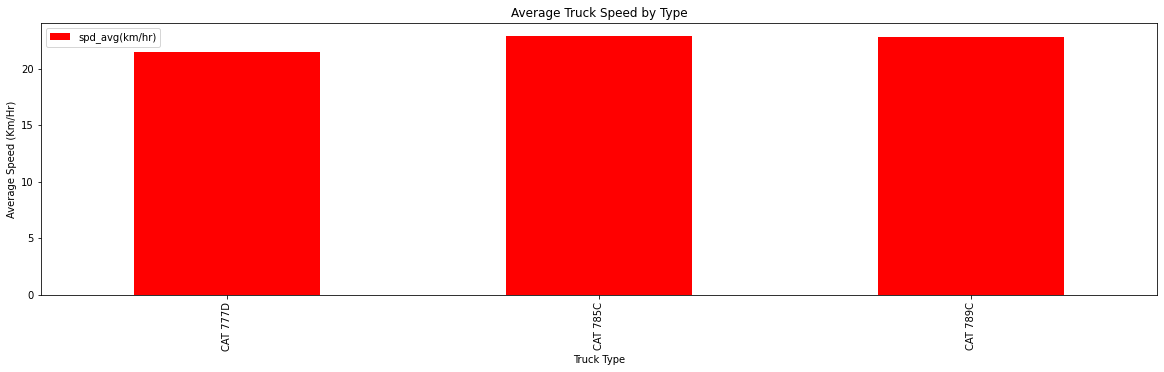

In [767]:
group_test_spd1.plot(kind='bar', figsize=(20,5), width=(0.5), color=('red'))

plt.title('Average Truck Speed by Type')
plt.ylabel('Average Speed (Km/Hr)')
plt.xlabel('Truck Type')

plt.show()

### 2. Average Truck Speed by Pit

In [768]:
group_test_spd2 = df_test_spd.groupby(['pit'], as_index=True).mean()
print("Average Truck speed by Pit is:")
group_test_spd2.round(2)

Average Truck speed by Pit is:


,spd_avg(km/hr)
pit,
MTE,22.85
MW4,23.18
PRI,23.84
TN1,20.78


### Visualization

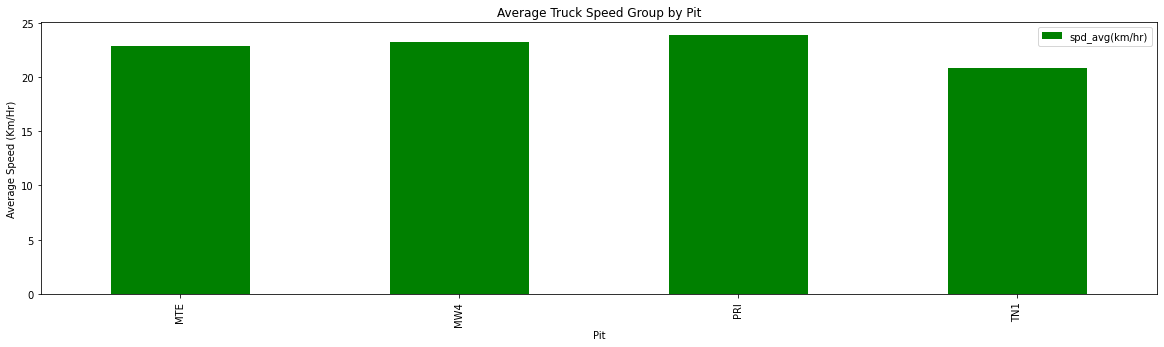

In [769]:
group_test_spd2.plot(kind='bar', figsize=(20,5), width=(0.5), color=('green'))

plt.title('Average Truck Speed Group by Pit')
plt.ylabel('Average Speed (Km/Hr)')
plt.xlabel('Pit')

plt.show()

### 3. Average Truck Speed by Truck Type group by Pit

In [770]:
group_test_spd3 = df_test_spd.groupby(['pit','truck_type'], as_index=True).mean()
print(group_test_spd3)

                spd_avg(km/hr)
pit truck_type                
MTE CAT 785C         22.850913
MW4 CAT 777D         21.809265
    CAT 785C         23.223107
PRI CAT 777D         19.110586
    CAT 785C         24.306681
    CAT 789C         23.411275
TN1 CAT 777D         21.171212
    CAT 785C         20.194591
    CAT 789C         21.715750


### Visualization

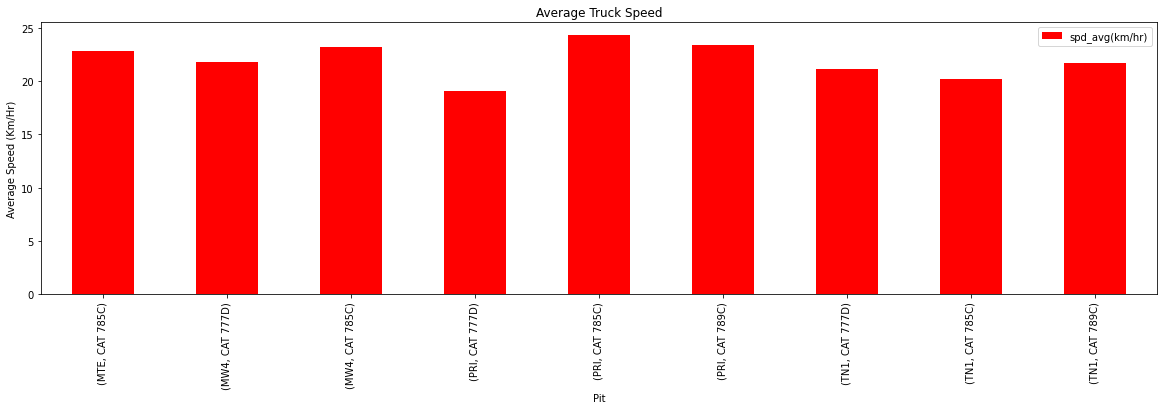

In [771]:
group_test_spd3.plot(kind='bar', figsize=(20,5), width=(0.5), color=('red', ))

plt.title('Average Truck Speed')
plt.ylabel('Average Speed (Km/Hr)')
plt.xlabel('Pit')

plt.show()

This grouped data is much easier to visualize when it is made into a `pivot table`. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

In [772]:
# Make group_test_spd3 with default index
group_test_spd3 = df_test_spd.groupby(['pit','truck_type'], as_index=False).mean()

# Make a dataframe for pivot table
group_pivot_spd3 = group_test_spd3.pivot(index='pit',columns='truck_type').round(2)
group_pivot_spd3.fillna(0)

spd_avg(km/hr)                  
truck_type       CAT 777D CAT 785C CAT 789C
pit                                        
MTE                  0.00    22.85     0.00
MW4                 21.81    23.22     0.00
PRI                 19.11    24.31    23.41
TN1                 21.17    20.19    21.72

### Visualization

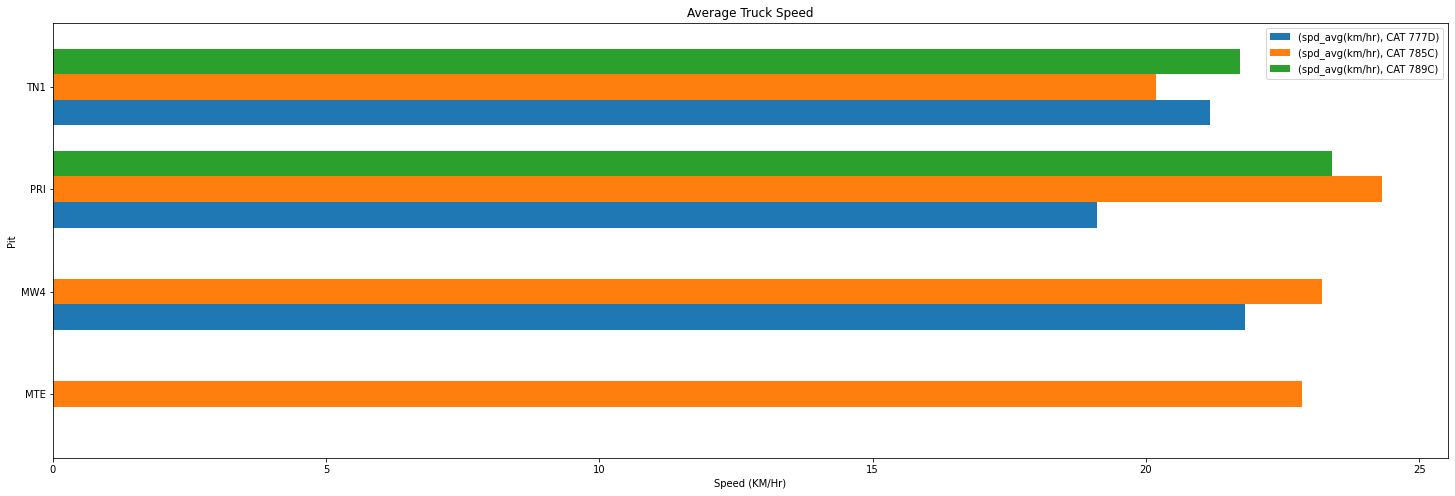

In [786]:
group_pivot_spd3.plot(kind='barh', figsize=(25,8), width=(0.75))

plt.title('Average Truck Speed')
plt.ylabel('Pit')
plt.xlabel('Speed (KM/Hr)')
plt.legend()

plt.show()

## Truck Speed Trend Line

In this section we will make a trendline of trucks speed for every type of trucks

In [457]:
df_tr = df[['date', 'truck', 'truck_type','pit', 'spd_avg(km/hr)']]

In [716]:
# Make dataframe for every truck type

# CAT 777D
df_777D = df_tr[(df_tr['truck_type']=='CAT 777D')].reset_index() # ------ take the "CAT 777D" value in "truck type" column
df_777D = df_777D.groupby(['date'], as_index=False).mean() # ----- grouping by datetime
df_777D['date'] = df_777D['date'].astype('datetime64[ns]') # ----- convert 'date' column from int to datetime
df_777D.sort_values(by='date', inplace=True, ascending=True) # ----- sorting by date
del df_777D['index'] # ----- deleting unused index

# CAT 785C
df_785 = df_tr[(df_tr['truck_type']=='CAT 785C')].reset_index()
df_785 = df_785.groupby(['date'], as_index=False).mean()
df_785['date'] = df_785['date'].astype('datetime64[ns]')
df_785.sort_values(by='date', inplace=True, ascending=True)
del df_785['index']

# CAT 789C
df_789 = df_tr[(df_tr['truck_type']=='CAT 789C')].reset_index()
df_789 = df_789.groupby(['date'], as_index=False).mean()
df_789['date'] = df_789['date'].astype('datetime64[ns]')
df_789.sort_values(by='date', inplace=True, ascending=True)
del df_789['index']



print(df_777D.head(3),"\n")
print(df_785.head(3),"\n")
print(df_789.head(3),"\n")

         date  spd_avg(km/hr)
0  2020-10-01       20.222612
9  2020-10-02       20.799355
18 2020-10-03       20.599577 

         date  spd_avg(km/hr)
0  2020-10-01       24.067501
11 2020-10-02       24.417859
22 2020-10-03       24.971693 

         date  spd_avg(km/hr)
0  2020-10-01       23.574503
11 2020-10-02       22.602583
22 2020-10-03       25.526737 

        date  spd_avg(km/hr)
0 2020-10-25       17.202500
1 2020-10-28       21.743214
2 2020-10-29       20.511667 

        date  spd_avg(km/hr)
0 2020-10-15            4.08 



### Visualization

#### 1. CAT 777D

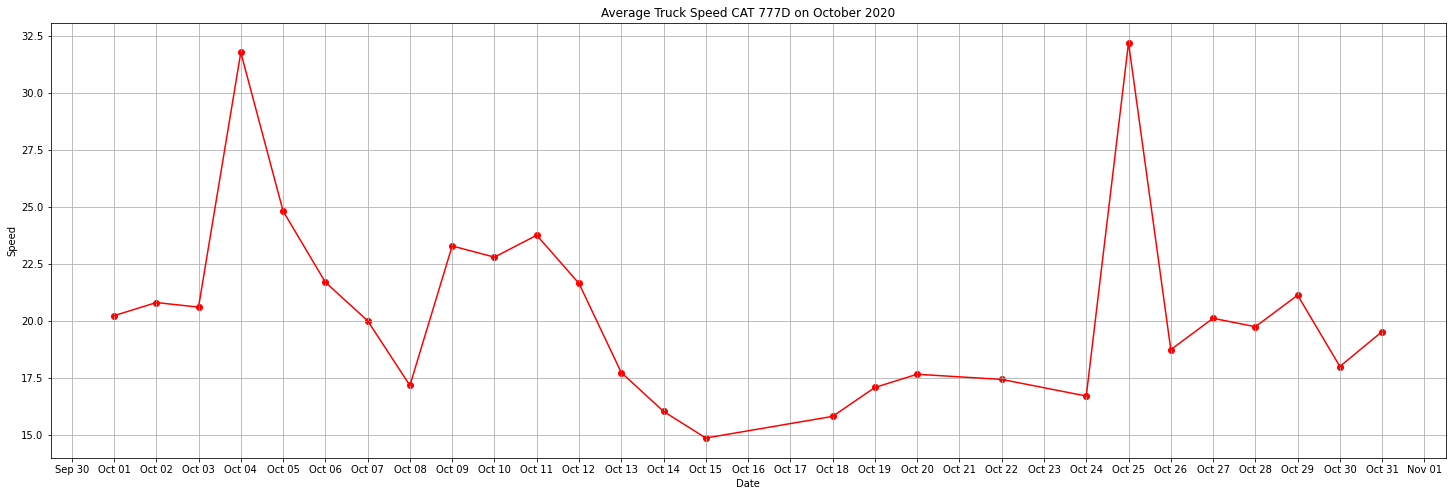

In [856]:
# Create figure and plot space
fig, ax =  plt.subplots(figsize=(25, 8))

# Add x-axis and y-axis (Scatter)
ax.scatter(df_777D['date'],
        df_777D['spd_avg(km/hr)'],
        color='red')

# Add x-axis and y-axis (Line)
ax.plot(df_777D['date'],
        df_777D['spd_avg(km/hr)'],
        color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Speed",
       title="Average Truck Speed CAT 777D on October 2020")

# Set background color
ax.set_facecolor('white')

# set grid
ax.grid()

#set ticks
ax.xaxis.set_major_locator(mdates.DayLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


plt.show()

#### 2. CAT 785C

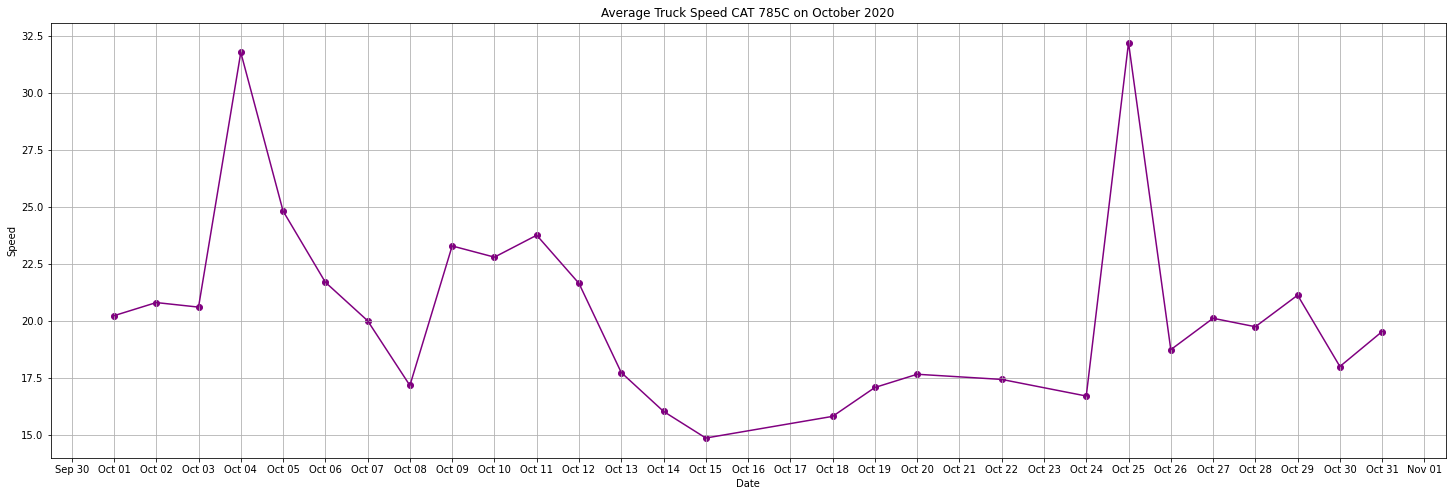

In [851]:
fig, ax =  plt.subplots(figsize=(25, 8))

ax.scatter(df_777D['date'],
        df_777D['spd_avg(km/hr)'],
        color='purple')

ax.plot(df_777D['date'],
        df_777D['spd_avg(km/hr)'],
        color='purple')

ax.set(xlabel="Date",
       ylabel="Speed",
       title="Average Truck Speed CAT 785C on October 2020")
ax.set_facecolor('1')
ax.grid()
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()

3. CAT 789C

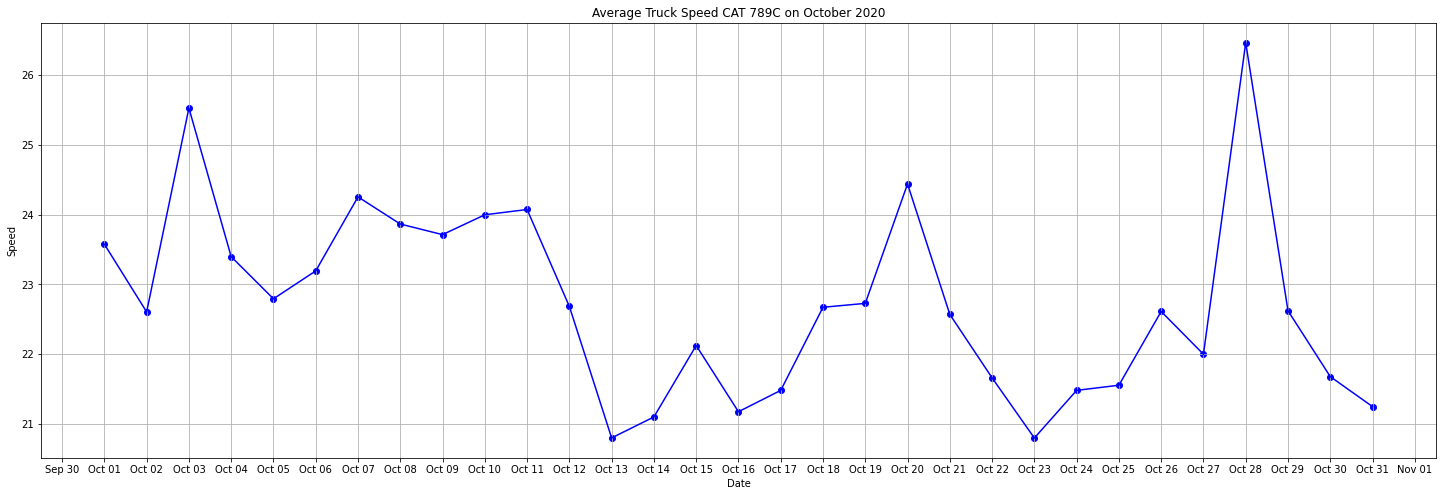

In [854]:
fig, ax =  plt.subplots(figsize=(25, 8))

ax.plot(df_789['date'],
        df_789['spd_avg(km/hr)'],
        color='blue')
ax.scatter(df_789['date'],
        df_789['spd_avg(km/hr)'],
        color='blue')

ax.set(xlabel="Date",
       ylabel="Speed",
       title="Average Truck Speed CAT 789C on October 2020")

ax.set_facecolor('1')
ax.grid()
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()